# 🎮 Análise de Vendas de Jogos de PS4

Este projeto tem como objetivo analisar dados de vendas de jogos de PS4, explorando **tendências ao longo dos anos**, **diferenças regionais**, **gêneros mais vendidos** e **empresas com maiores vendas globais**.

O dataset contém informações como:
- Nome do jogo  
- Ano de lançamento  
- Vendas por região (América do Norte, Europa, Japão, Resto do Mundo)  
- Vendas Globais  
- Publisher e Gênero

In [32]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [33]:
# lendo os dados
df = pd.read_csv('PS4_GamesSales.csv', encoding='latin1')

# verificando
df.head()

,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global
0,Grand Theft Auto V,2014.0,Action,Rockstar Games,6.06,9.71,0.60,3.02,19.39
1,Call of Duty: Black Ops 3,2015.0,Shooter,Activision,6.18,6.05,0.41,2.44,15.09
2,Red Dead Redemption 2,2018.0,Action-Adventure,Rockstar Games,5.26,6.21,0.21,2.26,13.94
3,Call of Duty: WWII,2017.0,Shooter,Activision,4.67,6.21,0.40,2.12,13.40
4,FIFA 18,2017.0,Sports,EA Sports,1.27,8.64,0.15,1.73,11.80


In [34]:
# verificando a dimensão do DataFrame
df.shape

(1034, 9)

In [35]:
# verificando as variáveis
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1034 entries, 0 to 1033
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Game           1034 non-null   object 
 1   Year           825 non-null    float64
 2   Genre          1034 non-null   object 
 3   Publisher      825 non-null    object 
 4   North America  1034 non-null   float64
 5   Europe         1034 non-null   float64
 6   Japan          1034 non-null   float64
 7   Rest of World  1034 non-null   float64
 8   Global         1034 non-null   float64
dtypes: float64(6), object(3)
memory usage: 72.8+ KB


In [36]:
# verificando a quantidade de valores nulos
df.isnull().sum()

,0
Game,0
Year,209
Genre,0
Publisher,209
North America,0
Europe,0
Japan,0
Rest of World,0
Global,0


In [37]:
# verificando a quantidade de valores únicos
df.nunique()

,0
Game,1031
Year,8
Genre,17
Publisher,152
North America,129
Europe,139
Japan,45
Rest of World,85
Global,206


In [38]:
# excluindo os valores nulos
df.dropna(inplace=True)

In [39]:
# alterando o tipo da coluna Year, de float para int
df['Year'] = df['Year'].astype(int)

In [40]:
# verificando a quantidade de valores nulos após tratamento
df.isnull().sum()

,0
Game,0
Year,0
Genre,0
Publisher,0
North America,0
Europe,0
Japan,0
Rest of World,0
Global,0


In [41]:
# estatisticas
df.describe()

,Year,North America,Europe,Japan,Rest of World,Global
count,825.000000,825.000000,825.000000,825.000000,825.000000,825.000000
mean,2015.966061,0.256448,0.311600,0.042048,0.111552,0.721721
std,1.298360,0.620259,0.868271,0.119814,0.274713,1.743122
min,2013.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2015.000000,0.000000,0.000000,0.000000,0.000000,0.030000
50%,2016.000000,0.050000,0.020000,0.000000,0.020000,0.120000
75%,2017.000000,0.190000,0.220000,0.040000,0.090000,0.560000
max,2020.000000,6.180000,9.710000,2.170000,3.020000,19.390000


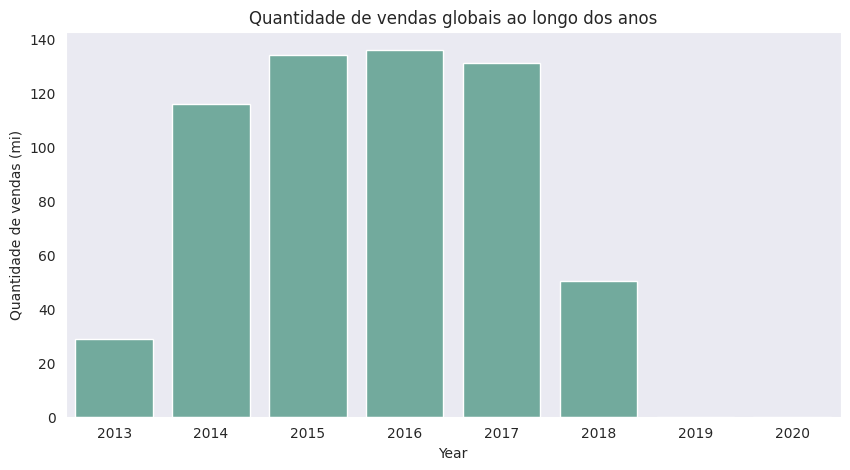

In [42]:
# Análise das quantidades de vendas globais por ano
plt.figure(figsize=(10, 5))
sns.barplot(x='Year', y='Global', data=df, color='#69b3a2', ci=None, estimator=sum)
sns.set_style('darkgrid')
plt.title('Quantidade de vendas globais ao longo dos anos')
plt.ylabel('Quantidade de vendas (mi)')
plt.show()

### 📊 Vendas Globais por Ano

As vendas globais atingiram o pico nos primeiros anos do PS4, com destaque para o período **2013–2015**.  
A partir de 2017, observa-se uma queda constante, possivelmente devido à **transição para a nova geração de consoles**.

In [43]:
# retirar os anos
df = df.loc[(df['Year'] != 2019) & (df['Year'] != 2020)]

# verificando
df.head()

,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global
0,Grand Theft Auto V,2014,Action,Rockstar Games,6.06,9.71,0.60,3.02,19.39
1,Call of Duty: Black Ops 3,2015,Shooter,Activision,6.18,6.05,0.41,2.44,15.09
2,Red Dead Redemption 2,2018,Action-Adventure,Rockstar Games,5.26,6.21,0.21,2.26,13.94
3,Call of Duty: WWII,2017,Shooter,Activision,4.67,6.21,0.40,2.12,13.40
4,FIFA 18,2017,Sports,EA Sports,1.27,8.64,0.15,1.73,11.80


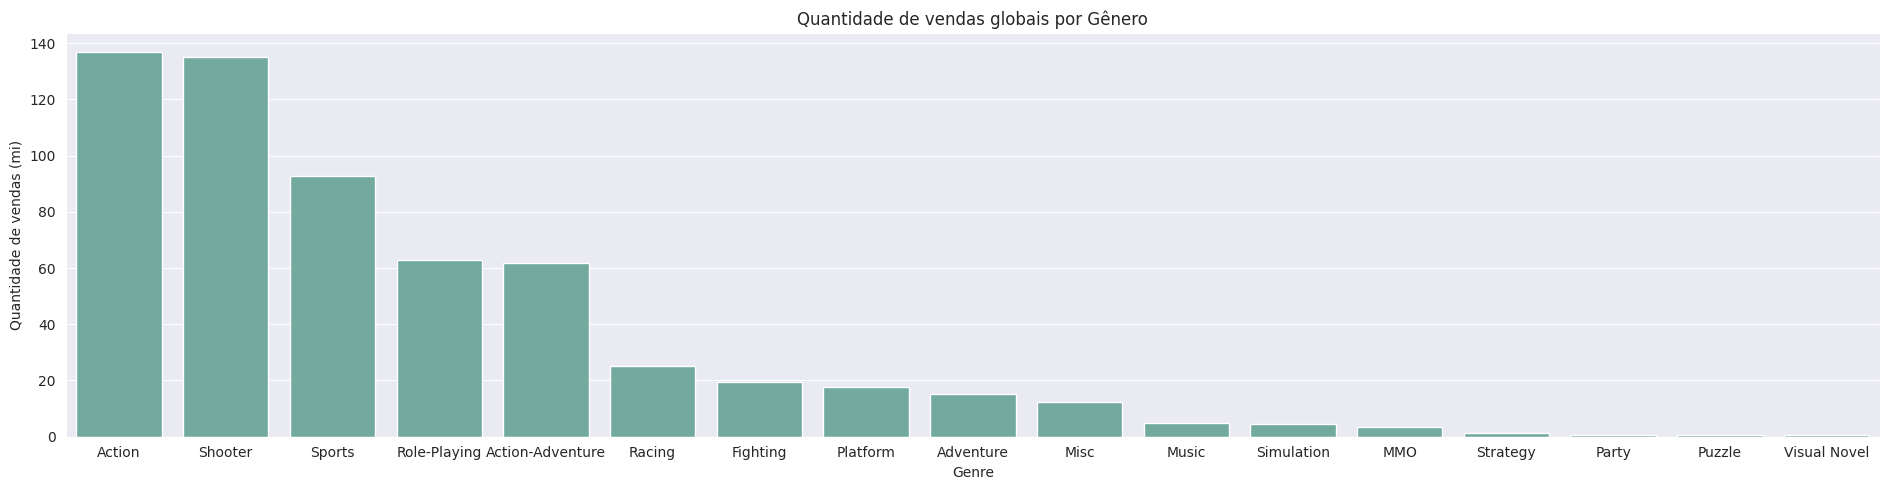

In [44]:
# Análise das quantidades de vendas globais por Gênero
plt.figure(figsize=(19, 5))

sns.barplot(x='Genre', y='Global', data=df, color='#69b3a2', ci=None, estimator=sum, order=df.groupby('Genre')['Global'].sum().sort_values(ascending=False).index)
sns.set_style('darkgrid')

plt.title('Quantidade de vendas globais por Gênero')
plt.ylabel('Quantidade de vendas (mi)')
plt.tight_layout()
plt.show()

### 🕹️ Vendas Globais por Gênero

Os gêneros **Action** e **Shooter** dominaram as vendas globais, refletindo a preferência do público por jogos com maior apelo competitivo e de ação.  
Gêneros mais nichados, como Puzzle e Strategy, tiveram menor participação.

In [45]:
# Top 10 empresas que mais publicaram jogos
df['Publisher'].value_counts().head(10).reset_index()

,Publisher,count
0,Namco Bandai Games,56
1,Sony Interactive Entertainment,44
2,Ubisoft,44
3,Square Enix,37
4,Tecmo Koei,37
5,Activision,30
6,Capcom,29
7,Warner Bros. Interactive Entertainment,26
8,Sony Computer Entertainment,24
9,NIS America,21


In [46]:
# Descobrindo quais empresas mais arrecadaram com os jogos
total_por_empresa = df.groupby('Publisher')['Global'].sum().sort_values(ascending=False).reset_index()

In [47]:
# top 10 empresas que mais arrecadaram
total_por_empresa.head(10)

,Publisher,Global
0,Activision,72.44
1,Ubisoft,59.16
2,Electronic Arts,54.96
3,Sony Interactive Entertainment,54.85
4,EA Sports,47.55
5,Sony Computer Entertainment,42.26
6,Rockstar Games,33.93
7,Square Enix,29.92
8,Bethesda Softworks,28.96
9,Warner Bros. Interactive Entertainment,27.83


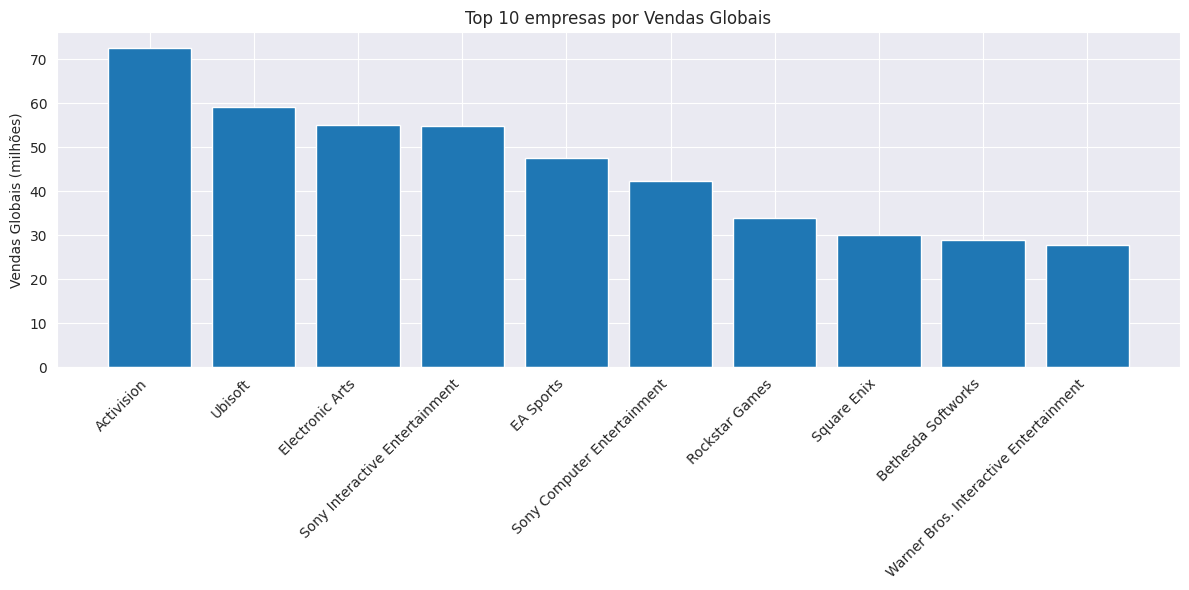

In [48]:
# Visualizando por Gráfico

top10 = total_por_empresa.head(10)

plt.figure(figsize=(12,6))
plt.bar(top10['Publisher'], top10['Global'])

plt.xticks(rotation=45, ha='right')
plt.ylabel('Vendas Globais (milhões)')
plt.title('Top 10 empresas por Vendas Globais')
plt.tight_layout()
plt.show()

### 🏆 Top 10 Publishers

As empresas com maiores receitas foram **Activision**, **Ubisoft** e **Electronic Arts**, representando uma parcela significativa das vendas globais.  
Isso mostra uma **concentração de mercado**, onde poucas empresas dominam a maior parte das vendas.

In [49]:
# Verificando as vendas por ano em cada região
df_ano = df.groupby('Year')[['North America', 'Europe', 'Japan', 'Rest of World', 'Global']].sum().reset_index()

In [50]:
# Verificando a porcentagem que cada região teve durante os anos em relação ao valor global
America = [America / Total * 100 for America, Total in zip( df_ano['North America'], df_ano['Global'])]
Europa = [Europa / Total * 100 for Europa, Total in zip( df_ano['Europe'], df_ano['Global'])]
Japao = [Japao / Total * 100 for Japao, Total in zip( df_ano['Japan'], df_ano['Global'])]
Mundo = [Mundo/ Total * 100 for Mundo, Total in zip( df_ano['Rest of World'], df_ano['Global'])]

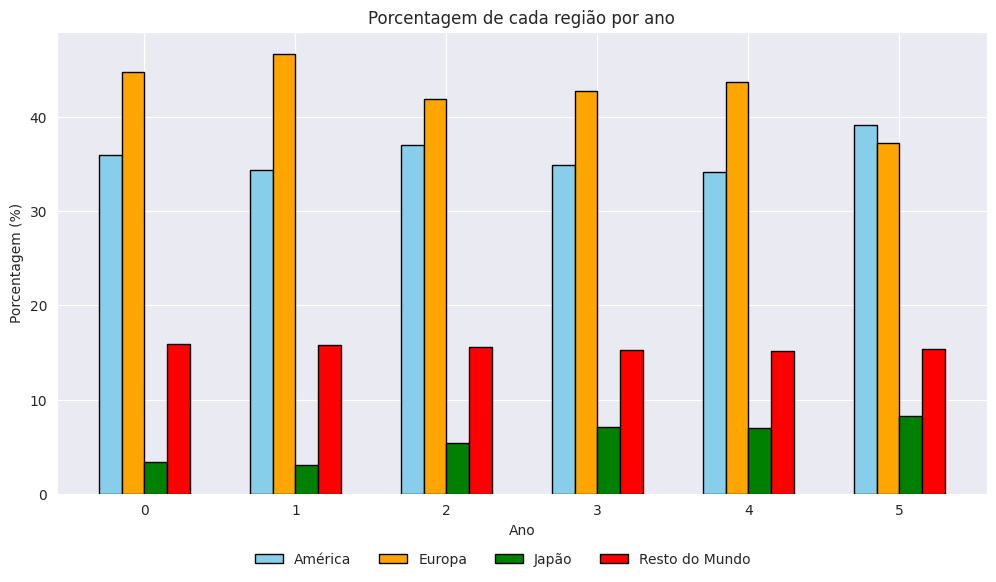

In [51]:
# Gráfico
plt.figure(figsize=(12, 6))

anos = df_ano.index  # os anos do seu DataFrame
x = np.arange(len(anos))   # posição de cada grupo de barras

# Largura de cada barra
width = 0.15

# Criando o gráfico de barras agrupadas
plt.bar(x - 1.5*width, America, width, label='América', color='skyblue', edgecolor='black')
plt.bar(x - 0.5*width, Europa, width, label='Europa', color='orange', edgecolor='black')
plt.bar(x + 0.5*width, Japao, width, label='Japão', color='green', edgecolor='black')
plt.bar(x + 1.5*width, Mundo, width, label='Resto do Mundo', color='red', edgecolor='black')
sns.set_style('darkgrid')

# Labels e título
plt.xlabel('Ano')
plt.ylabel('Porcentagem (%)')
plt.title('Porcentagem de cada região por ano')
plt.xticks(x, anos)  # colocar os anos no eixo X
plt.legend(loc='upper left', bbox_to_anchor=(0.2, -0.1), ncol=4, frameon=False)

plt.show()


### 🌍 Distribuição Regional das Vendas (%)

A **Europa** lidera as vendas em praticamente todos os anos, seguida pela **América do Norte**.  
O Japão apresenta a menor participação, enquanto o “Resto do Mundo” tem contribuição mais constante.

In [52]:
America, Europa, Japao, Mundo

([35.9874826147427,
  34.35476909797151,
  37.01768788715576,
  34.92484526967286,
  34.20168067226891,
  39.14342629482071],
 [44.78442280945759,
  46.71558049201555,
  41.95089185760131,
  42.72030651340996,
  43.68220015278838,
  37.25099601593625],
 [3.372739916550765,
  3.0902028485110056,
  5.433241286663184,
  7.110226937813145,
  6.936592818945759,
  8.227091633466136],
 [15.890125173852576,
  15.78765645230902,
  15.58325248152847,
  15.259357500736812,
  15.194805194805195,
  15.31872509960159])

---------------------------------------------------------------------

In [53]:
# Calculando a porcentagem total de cada região em relação ao total global (todos os anos)

# somando todas as colunas para obter o valor total
total_america = df['North America'].sum()
total_europa = df['Europe'].sum()
total_japao = df['Japan'].sum()
total_mundo = df['Rest of World'].sum()
total_global = df['Global'].sum()

# Porcentagem total de cada região sobre o total global
perc_america = total_america / total_global * 100
perc_europa = total_europa / total_global * 100
perc_japao = total_japao / total_global * 100
perc_mundo = total_mundo / total_global * 100

In [54]:
perc_america, perc_europa, perc_japao, perc_mundo

(np.float64(35.53290114540996),
 np.float64(43.174565852675414),
 np.float64(5.826139531759093),
 np.float64(15.456316549662422))

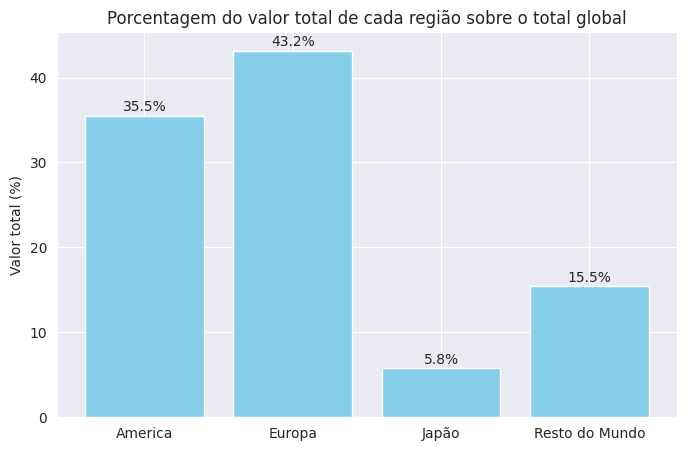

In [55]:
# Tamanho
plt.figure(figsize=(8, 5))

# Valores e nomes das regiões
regioes = ['America', 'Europa', 'Japão', 'Resto do Mundo']
valores = [perc_america, perc_europa, perc_japao, perc_mundo]

# Criando o gráfico de barras
plt.bar(regioes, valores, color='skyblue')
sns.set_style('dark')

# Adicionando título e labels
plt.ylabel('Valor total (%)')
plt.title('Porcentagem do valor total de cada região sobre o total global')

# Mostrando os valores acima das barras
for i, v in enumerate(valores):
    plt.text(i, v + 0.5, f'{v:.1f}%', ha='center')

plt.show()

### 📈 Porcentagem Total de Vendas por Região

No acumulado de todos os anos, **América do Norte e Europa** representam juntas quase **80%** das vendas globais, reforçando o peso desses mercados para a indústria de jogos.

## 📝 Conclusão

- As vendas atingiram o auge entre 2013 e 2015, caindo nos anos seguintes.  
- Action e Shooter são os gêneros mais populares.  
- Poucas publishers concentram a maior parte das vendas.  
- América do Norte e Europa são os principais mercados, somando quase 80% do total.  

📌 Esta análise demonstra como dados simples podem revelar **tendências de mercado** importantes.

In [59]:
df_ano

,Year,North America,Europe,Japan,Rest of World,Global
0,2013,10.35,12.88,0.97,4.57,28.76
1,2014,39.80,54.12,3.58,18.29,115.85
2,2015,49.60,56.21,7.28,20.88,133.99
3,2016,47.40,57.98,9.65,20.71,135.72
4,2017,44.77,57.18,9.08,19.89,130.90
5,2018,19.65,18.70,4.13,7.69,50.20
